In [310]:
library(dplyr)
library(ggplot2)
library(tibble)

options(scipen = 999)
options(repr.plot.width=5, repr.plot.height=3.5)

In [342]:
data <- read.csv('data.csv')
data$success <- factor(data$success, levels=c(0, 1), labels=c('Basarisiz', 'Basarili'))

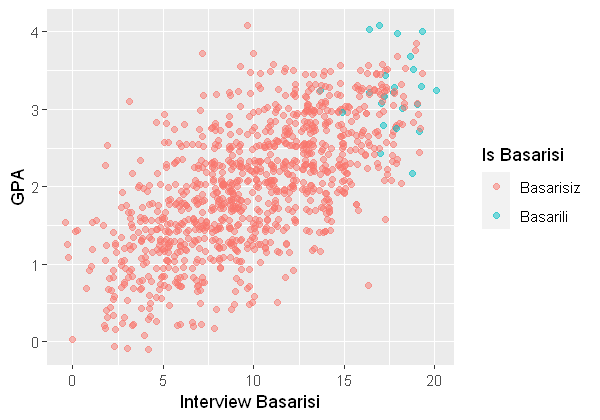

In [343]:
ggplot(data) + aes(x=interview, y=gpa, color=success) + ylab('GPA') + xlab('Interview Başarısı')  + geom_jitter(alpha=0.5)  + labs(color = "İş Başarısı")


# A tibble: 1 x 1
      n
  <int>
1    16


success
Basarisiz  Basarili 
        8         8 

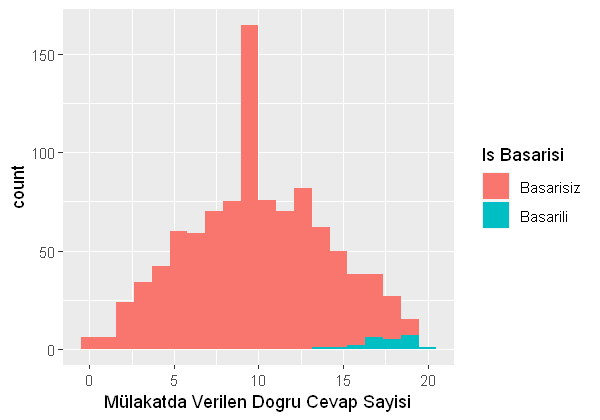

In [347]:
ggplot(data) + aes(x=interview, fill=success) + geom_histogram(bins=20) + xlab('Mülakatda Verilen Doğru Cevap Sayısı') + labs(fill='İş Başarısı')
print(count(data %>% filter(interview > 18)))
xtabs(~success, data=data %>% filter(interview > 18))

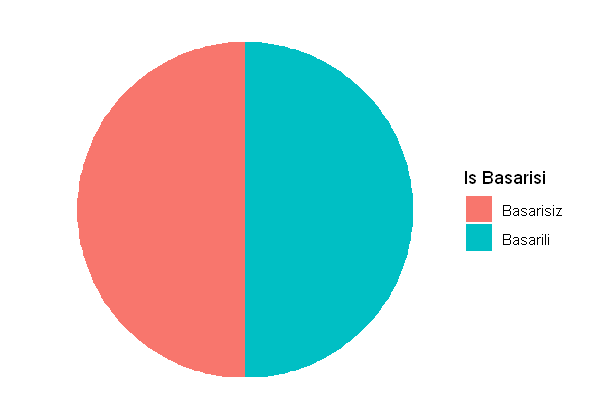

In [348]:
data_cutted <- data %>% filter(interview > 18)
data_cutted_grouped <- data_cutted %>% group_by(success) %>% tally()

ggplot(data_cutted_grouped, aes(x="", y=n, fill=success)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0)+
  theme_void() + labs(fill='İs Basarisi')

success
Basarisiz  Basarili 
      896       104 

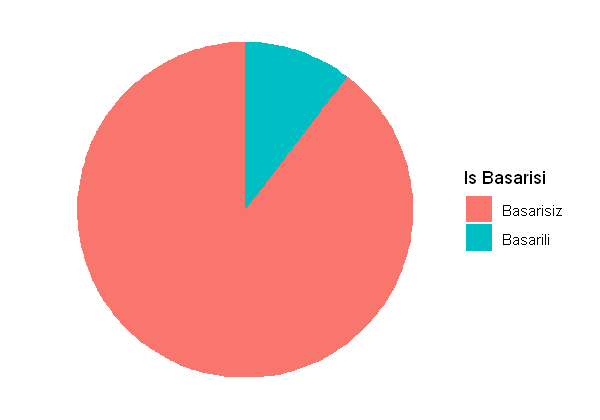

In [332]:
data_cutted <- data 
data_cutted_grouped <- data_cutted %>% group_by(success) %>% tally()

ggplot(data_cutted_grouped, aes(x="", y=n, fill=success)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0)+
  theme_void() + labs(fill='İs Basarisi')
xtabs(~success, data=data_cutted)

success
Basarisiz  Basarili 
       73        63 

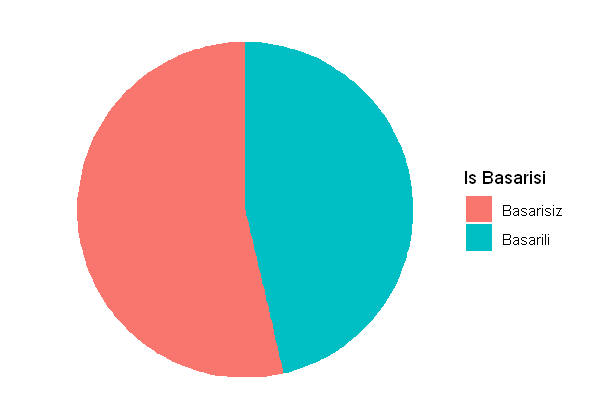

In [333]:
data_cutted <- data %>% filter(university == 1)
xtabs(~success, data=data_cutted)
data_cutted_grouped <- data_cutted %>% group_by(success) %>% tally()

ggplot(data_cutted_grouped, aes(x="", y=n, fill=success)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0)+
  theme_void() + labs(fill='İs Basarisi')


success
Basarisiz  Basarili 
       22        48 

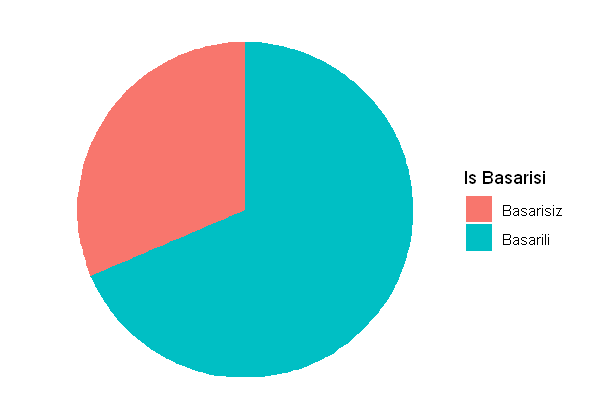

In [334]:

data_cutted <- data %>% filter(university == 1) %>% filter(highschool == 1)
xtabs(~success, data=data_cutted)
data_cutted_grouped <- data_cutted %>% group_by(success) %>% tally()

ggplot(data_cutted_grouped, aes(x="", y=n, fill=success)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0)+
  theme_void() + labs(fill='İs Basarisi')

success
Basarisiz  Basarili 
        0         4 

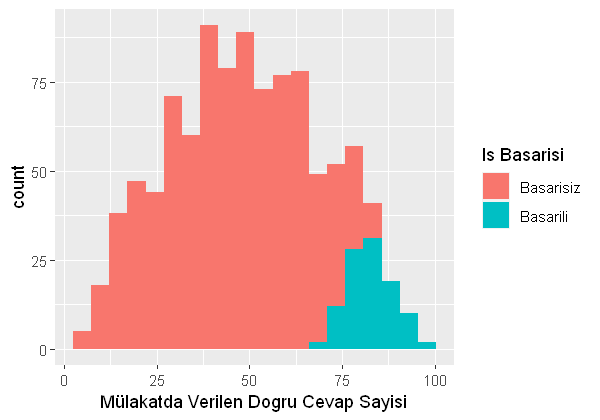

In [335]:
ggplot(data) + aes(x=long_interview, fill=success) + geom_histogram(bins=20) + xlab('Mülakatda Verilen Doğru Cevap Sayısı') + labs(fill='İş Başarısı')
xtabs(~success,data=data_cutted  %>% filter(long_interview > 92))

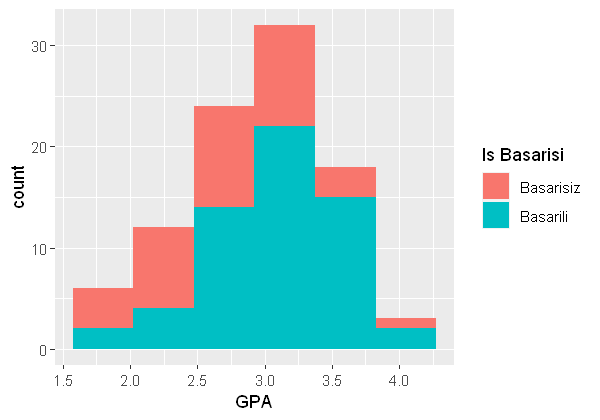

In [336]:
data_failure <- data %>% filter(highschool == 1)
ggplot(data_failure) + aes(x=gpa, fill=success) + geom_histogram(bins=6) + xlab('GPA') + labs(fill='İş Başarısı')


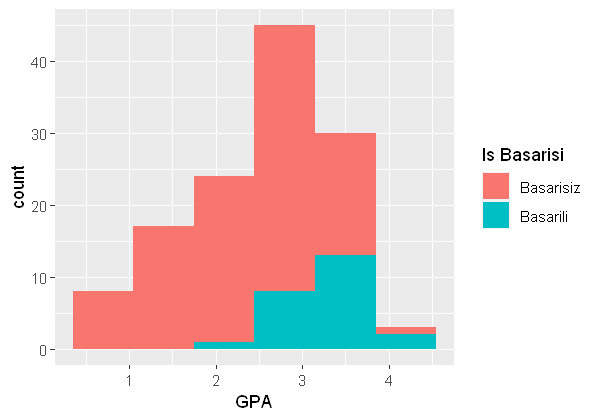

In [320]:
data_failure <- data %>% filter(university == 1)
ggplot(data_failure) + aes(x=gpa, fill=success) + geom_histogram(bins=6) + xlab('GPA') + labs(fill='İş Başarısı')


Warning message:
"Removed 1 rows containing missing values (geom_point)."

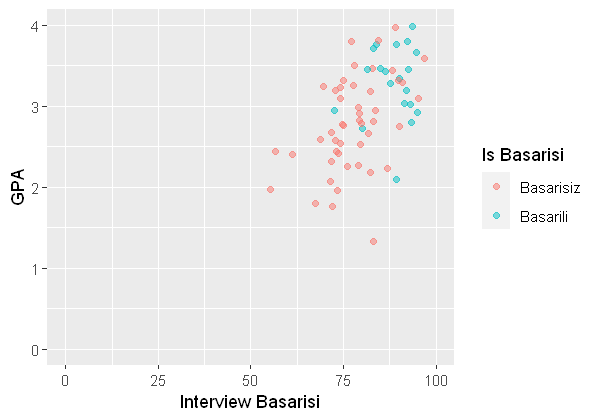

In [321]:
data_failure <- data %>% filter(university == 1) %>% filter(highschool == 1)
ggplot(data_failure) + aes(x=long_interview, y=gpa, color=success) + ylim(0, 4) + xlim(0, 100) + ylab('GPA') + xlab('Interview Başarısı')  + geom_jitter(alpha=0.5)  + labs(color = "İş Başarısı")


Warning message:
"Removed 1 rows containing missing values (geom_point)."

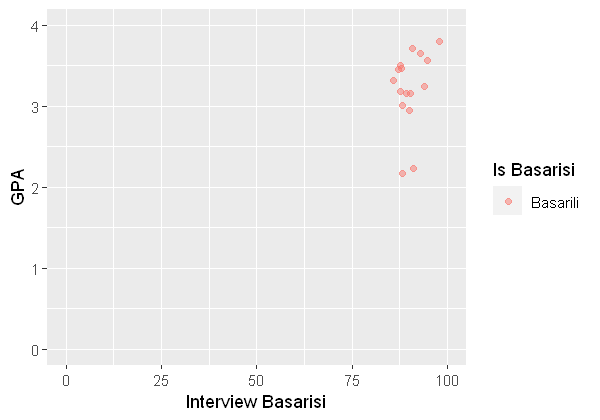

In [340]:
data_failure <- data %>% filter(university == 1) %>% filter(highschool == 1)  %>% filter(long_interview > 85)
ggplot(data_failure) + aes(x=long_interview, y=gpa, color=success) + ylim(0, 4) + xlim(0, 100) + ylab('GPA') + xlab('Interview Başarısı')  + geom_jitter(alpha=0.5)  + labs(color = "İş Başarısı")


Warning message:
"Removed 1 rows containing missing values (geom_point)."

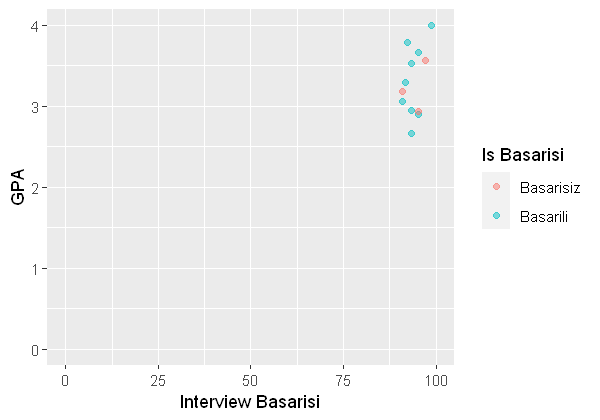

In [327]:
data_failure <- data %>% filter(university == 1) %>% filter(highschool == 1)  %>% filter(long_interview > 90)
ggplot(data_failure) + aes(x=long_interview, y=gpa, color=success) + ylim(0, 4) + xlim(0, 100) + ylab('GPA') + xlab('Interview Başarısı')  + geom_jitter(alpha=0.5)  + labs(color = "İş Başarısı")


In [324]:
count(data %>% filter(university == 1) %>% filter(highschool == 1)  %>% filter(long_interview > 90))

n
13


In [19]:
model <- aov(success ~ interview, data=data)
summary(model)

             Df Sum Sq Mean Sq F value  Pr(>F)   
interview     1   0.83  0.8342   9.969 0.00164 **
Residuals   998  83.52  0.0837                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [20]:
model <- aov(success ~ gpa, data=data)
summary(model)

             Df Sum Sq Mean Sq F value  Pr(>F)   
gpa           1   0.90  0.8982   10.74 0.00108 **
Residuals   998  83.45  0.0836                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1